In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
# Specify the path to your CSV file
cars_file_path = r"C:\Users\Beyonka\Project 1\USA_cars_datasets.csv"

# Read the CSV file into a Pandas DataFrame
cars_df = pd.read_csv(cars_file_path)

# Display the DataFrame
cars_df

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [3]:
# Drop null values
cars_df_clean = cars_df.dropna()
cars_df_clean.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [4]:
# Count the occurrences of each brand
brand_counts = cars_df_clean['brand'].value_counts()
brand_counts

brand
ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
kia                  13
buick                13
infiniti             12
honda                12
cadillac             10
mercedes-benz        10
heartland             5
land                  4
peterbilt             4
audi                  4
acura                 3
lincoln               2
lexus                 2
mazda                 2
maserati              1
toyota                1
harley-davidson       1
jaguar                1
ram                   1
Name: count, dtype: int64

In [5]:
# Create a DataFrame with the top 4 brands
top_brands_df = pd.DataFrame({'brand': brand_counts.index, 'Count': brand_counts.values})
top_brands_df.head()

,brand,Count
0,ford,1235
1,dodge,432
2,nissan,312
3,chevrolet,297
4,gmc,42


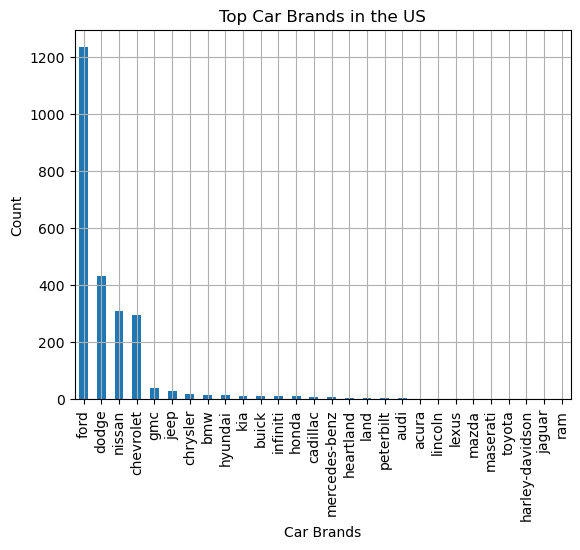

In [6]:
#Making a variable for what is being counted which is Brands
total_car = cars_df_clean['brand'].value_counts()

# Setting up bar plot
ax = total_car.plot(x= "brand", y=['Count'], kind='bar', xlabel="Car Brands", ylabel="Count", title= "Top Car Brands in the US")

plt.grid()

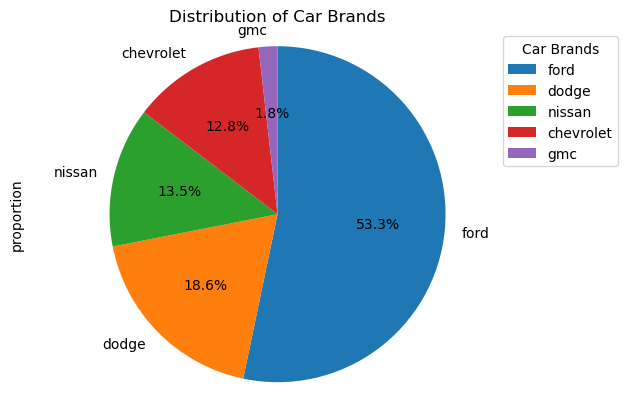

In [7]:
# Generate a pie plot showing the distribution of the car brands
top = 5
car_brands = cars_df_clean['brand'].value_counts(5).nlargest(top)

# Create a pie chart
car_brands.plot.pie(autopct="%1.1f%%", startangle=90, counterclock=False)  # Adjust the start angle

# Add a title
plt.title('Distribution of Car Brands')

# Set aspect ratio to be equal, making the pie circular
plt.axis('equal')

# Adjusting legend
plt.legend(title="Car Brands", loc='upper right', bbox_to_anchor=(1.2, 1))

# Display graph
plt.show()

In [8]:
# Count the occurrences of each brand
brand_counts = top_brands_df['brand'].value_counts()

# Get the top brand
top_brand = brand_counts.idxmax()

# Display the top brand
print("Top Brand:", top_brand)

Top Brand: ford
